In [1]:
#I choose dataset "cookie_cat" on kaggle. The data is about an A/B test with a mobile game, Cookie Cats.

# Columns
# userid A unique number that identifies each player.
# version Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
# sum_gamerounds The number of game rounds played by the player during the first 14 days after install.
# retention_1 Did the player come back and play 1 day after installing?
# retention_7 Did the player come back and play 7 days after installing?

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. It also features singing cats.

Roll out plan:
As players progress through the levels of the game, they will occasionally encounter gates that force them to wait certain 
amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important 
purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game
being increased and prolonged due to the force of in-app purchase.

Where to place the gate to promote the purchase of the game is crucial, so here we set the A/B testing based on difference settings 
of gates. Initially the first gate was placed at level 30. And this is control group for this A/B testing. Then placing the gate at
level 40 is the testing group here, we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 
30 to level 40. In particular, we will look at the impact on player retention. 
Metrics:
And we set two metrics to measure the retention, 
if the player come back and play 1 day after installing and another metric is if the player come back and play 7 days after installing.

In [2]:
#A/B test two groups are controlled by gate_30 and gate_40
# Control group is gate_30, test group is gate_40

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [4]:
df = pd.read_csv('data/cookie_cats.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [6]:
df.head(20)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [7]:
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [8]:
# When a player installed the game, the player was randomly assigned to 

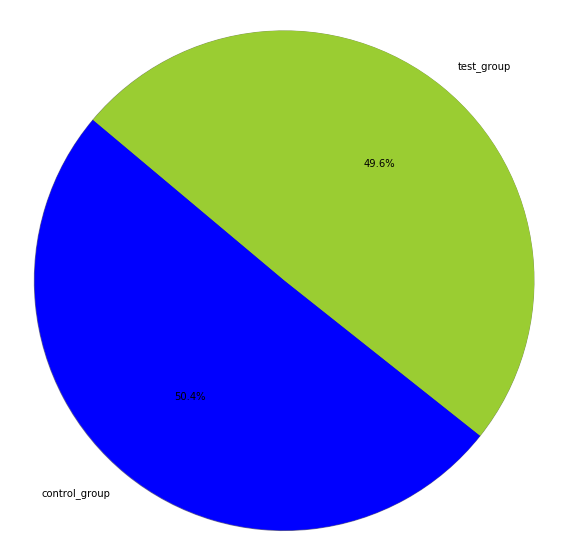

In [9]:
# plot pie chart on the value counts
fig= plt.figure(figsize=(10,10))
labels = 'control_group', 'test_group'
sizes = [ 45489, 44700]
colors = ['blue', 'yellowgreen']
explode = (0, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,radius=20)

plt.axis('equal')
plt.show()

In [10]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [11]:
# The stats above shows for control group and testing group, all the columns except user_id have players in control group and 
# testing group about same proportion here, both group takes 50% of the total players, in column sum_gamerounds, retention_1 and 
# retention_7

In [12]:
import seaborn as sns

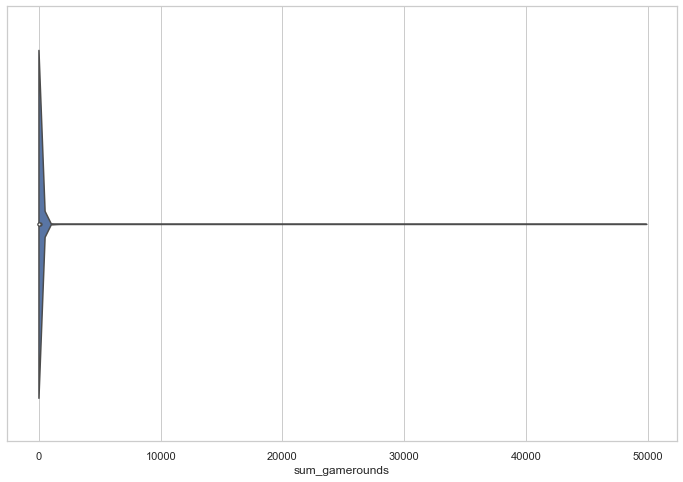

In [13]:
# visualize column sum_gamerounds by violin plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x=df['sum_gamerounds'])

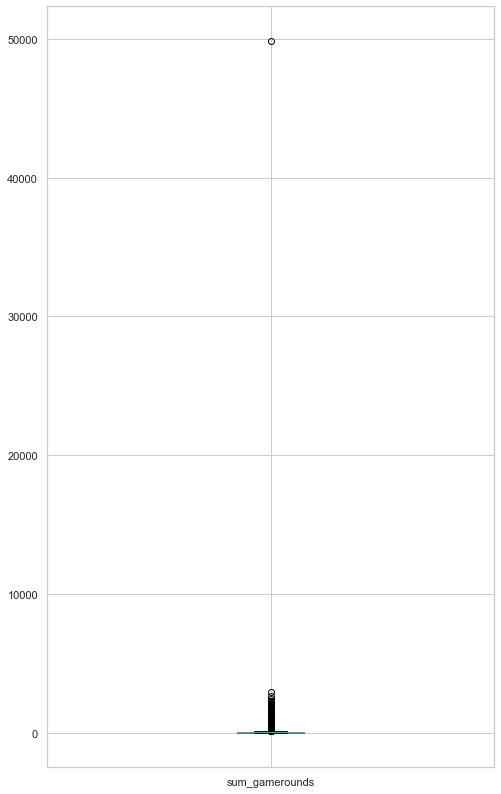

In [14]:
# boxplot on the column sum_gamerounds
plt.figure(figsize=(8, 14))
df['sum_gamerounds'].plot.box()

In [15]:
# From the plot above, we can see there is a outlier and the value is 49854, which is huge number comparing to most of the 
# other values, I'm guessing exclude this outlier from data and plot again. 

In [16]:
#find out the index of this outlier
df.index[df['sum_gamerounds'] == 49854].tolist()

[57702]

In [17]:
# exlcude the outlier
df=df.drop([57702])

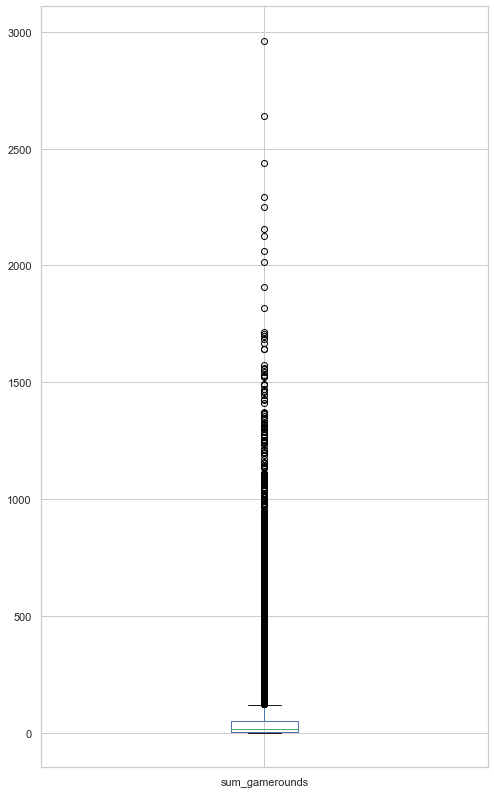

In [18]:
plt.figure(figsize=(8, 14))
df['sum_gamerounds'].plot.box()

In [19]:
# As we can see the box plot above, majority of the data points fell in range between 0-50, and above 100, the data are 
# all outliers

In [20]:
df['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

In [21]:
# from the stats above it's clear to see median value of column sum_gamerounds is 16(16 is the median), and 16 should be a benchmark 
# 50% of the players played less than 16 rounds in first 14 days
# 75% of the payers played less than 51 rounds in the first 14 days
# value for checking out how many games player played

In [22]:
# 50% of the players play less than 16 games after the 14 days of installing app. And this stats interests me to count 
# number of players for each value in column sum_gamerounds

In [23]:
rounds_stat=df.groupby('sum_gamerounds')['userid'].count()
print(rounds_stat)

sum_gamerounds
0       3994
1       5538
2       4606
3       3958
4       3629
5       2992
6       2861
7       2379
8       2267
9       2013
10      1752
11      1654
12      1570
13      1594
14      1519
15      1446
16      1342
17      1269
18      1228
19      1158
20      1033
21      1032
22       934
23       879
24       794
25       792
26       689
27       723
28       662
29       613
        ... 
1446       1
1457       1
1462       1
1469       1
1490       1
1491       1
1522       1
1528       1
1529       1
1544       1
1558       1
1559       1
1573       1
1643       2
1667       1
1687       1
1697       1
1705       1
1714       1
1816       1
1906       1
2015       1
2063       1
2124       1
2156       1
2251       1
2294       1
2438       1
2640       1
2961       1
Name: userid, Length: 941, dtype: int64


From the above result it's clear to see, there are 3994 people played 0 time of the game after installing, this is 
kind of distressing for game designer. As far as I can guess, there are a few reasons why those 3994 people didn't 
play the game at all. 
As soon as some people enter the app, they don't like the setting or surface of the game app and they lost interests.Or people didn't even start play at all in first 14 days.

When sum_gamerounds=1,there are 5538 players. This stat means there are 5538 players played only 1 round of game after 
installing the app within first 14 days.This number is not small, it's reasonable to pay attention to this number, and it 
should be analyzed for reasons why people play only 1 round. As far as I can guess, reasons could be like, people don't 
like the game after they tried one round, some people didn't like the game, some people realized the game is fun for them etc.

In [24]:
#sorted_rounds = df.sort('rounds_stat', ascending=False)

In [25]:
# group the data based on retention_1 column. retention_1 column has true false binary values

control = df[df['version'] == 'gate_30']
test = df[df['version']== 'gate_40']
df.info()
print(control.info())
print('\n')
print(control.head())
print('\n')
print(test.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90188 entries, 0 to 90188
Data columns (total 5 columns):
userid            90188 non-null int64
version           90188 non-null object
sum_gamerounds    90188 non-null int64
retention_1       90188 non-null bool
retention_7       90188 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 2.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44699 entries, 0 to 90186
Data columns (total 5 columns):
userid            44699 non-null int64
version           44699 non-null object
sum_gamerounds    44699 non-null int64
retention_1       44699 non-null bool
retention_7       44699 non-null bool
dtypes: bool(2), int64(2), object(1)
memory usage: 1.4+ MB
None


    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3        False        False
1      337  gate_30              38         True        False
6     1066  gate_30               0        False        False
11    2101  gate_30    

In [26]:
control['retention_1'].value_counts()

False    24665
True     20034
Name: retention_1, dtype: int64

In [27]:
conversion_rate_control= 20034/(20034+24665)
print(conversion_rate_control)

0.4481979462627799


In [28]:
test['retention_1'].value_counts()

False    25370
True     20119
Name: retention_1, dtype: int64

In [29]:
conversion_rate_test=20119/(20119+25370)
print(conversion_rate_test)

0.44228274967574577


The test group conversion rate of retention_1 is almost same as control group.The conversion rate of gate level 30 is slight higher than gate level 40.

In [30]:
# check the conversion rate for retention_7
control['retention_7'].value_counts()

False    36198
True      8501
Name: retention_7, dtype: int64

In [31]:
conversion_rate_control7=8501/(8501+36198)
print(conversion_rate_control7)

0.19018322557551623


In [32]:
test['retention_7'].value_counts()


False    37210
True      8279
Name: retention_7, dtype: int64

In [33]:
conversion_rate_test7=8279/(8279+37210)
print(conversion_rate_test7) 

0.18200004396667327


The test group conversion rate is even lower than control group, which means set gate at level 30 have higher conversion rate than set gate at level 40.

In [39]:
stats.ttest_ind(df[df['version'=='gate_30']],df[df['version'=='gate_40']]) # tring to compare whole control group with whole test group, but gave error?

KeyError: False

In [35]:
stats.ttest_ind(control['retention_1'],test['retention_1']) # check control group and test group is siginifcantly different or not based on retention_1 column

Ttest_indResult(statistic=1.7871153372992439, pvalue=0.07392220630182521)

In [36]:
stats.ttest_ind(control['retention_7'],test['retention_7'])## check control group and test group is siginifcantly different or not based on retention_7 column

Ttest_indResult(statistic=3.1575495965685936, pvalue=0.0015915357297854773)

From the two p-values above, we can see p-value based on rentention_1 is 0.0739>0.05, which is not significantly different, and which can not reject null hypothesis, and two groups of
retention_1 are same.
From the second p-value=0.00159, smaller than 0.05, which can reject null hypothesis, the two samples are significantly different.